In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install matplotlib

     |████████████████████████████████| 13.1MB 242kB/s 


# Analysis
- 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from pandas_profiling import ProfileReport
warnings.filterwarnings('ignore')
%matplotlib inline


#df = pd.read_csv('/content/drive/My Drive/factored_ia_sessions/project/co_properties.csv')

In [0]:
print("The dataset has {} rows and {} columns. {} duplicated rows".format(df.shape[0], df.shape[1],df.duplicated().sum()))

The dataset has 974977 rows and 25 columns. 0 duplicated rows


In [0]:
sell = df.operation_type == "Venta"
df = df[sell]

s_types = df.dtypes
s_head= df.apply(lambda x: x[0:3].tolist())

explo1 = pd.DataFrame({'Types': s_types,
                      'Head': s_head}).sort_values(by=['Types'],ascending=False)
explo1.transpose()

,id,l4,property_type,description,title,price_period,currency,ad_type,l5,l6,l3,l2,l1,created_on,end_date,start_date,operation_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lon,lat
Types,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64
Head,"[4OPTRe/9KsMoa6fvcizh/A==, yOMBjLf0eajrK7HhqnV...","[nan, nan, nan]","[Casa, Casa, Casa]",[Se vende espectacular casa ubicada en el barr...,"[Venta casa en La Campia en Barranquilla, VEND...","[nan, nan, nan]","[COP, COP, COP]","[Propiedad, Propiedad, Propiedad]","[nan, nan, nan]","[nan, nan, nan]","[Barranquilla, nan, nan]","[Atlántico, Córdoba, Córdoba]","[Colombia, Colombia, Colombia]","[2018-12-08, 2018-09-06, 2018-09-06]","[2019-07-25, 2019-05-22, 2019-05-22]","[2018-12-08, 2018-09-06, 2018-09-06]","[Venta, Venta, Venta]","[4.0, 4.0, 4.0]","[nan, nan, nan]","[4.0, 2.0, 2.0]","[546.0, nan, nan]","[306.0, 98.0, 98.0]","[1000000000.0, 110000000.0, 135000000.0]","[-74.820729301, -75.8745541, -75.8926655]","[10.998798109, 8.7460551, 8.761538]"


In [0]:
s_missing= df.isnull().sum()
s_missingper= (df.isnull().sum()/df.shape[0])*100

explo2 = pd.DataFrame({'Types': s_types,
                       'Missing': s_missing,
                      'Missing%': s_missingper,}).sort_values(by=['Missing%','Types'],ascending=False)
explo2.transpose()

,l6,l5,price_period,l4,bedrooms,rooms,surface_covered,surface_total,lat,lon,bathrooms,l3,currency,price,description,id,ad_type,start_date,end_date,created_on,l1,l2,title,property_type,operation_type
Types,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,object,object,object,object,object,object,object,object,object
Missing,620279,556087,476507,463093,369752,352685,339302,239092,108134,108134,95134,79885,10799,5953,6,0,0,0,0,0,0,0,0,0,0
Missing%,97.0823,87.0353,74.58,72.4805,57.8713,55.2001,53.1055,37.4212,16.9245,16.9245,14.8898,12.5031,1.69019,0.931727,0.000939083,0,0,0,0,0,0,0,0,0,0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

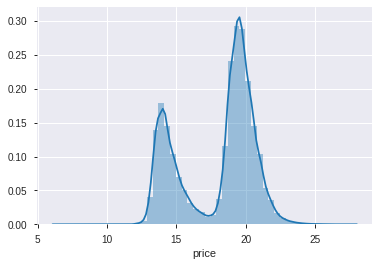

In [0]:
sns.distplot(np.log(data[data['price']>0]['price']));
plt.ylabel =('Frequency')
plt.title = ('SalePrice Distribution');


In [0]:
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

NameError: ignored

In [0]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [0]:
henry = df[df['price']>0][['created_on', 'price']]

In [0]:
henry['created_on'] = pd.to_datetime(df.created_on)
henry = henry.sort_values(by='created_on')

In [0]:
henry.to_csv('time_series_vivienda.csv')

In [0]:
henry.head(5)

,created_on,price
74051,2018-08-30,65000000.0
74102,2018-08-30,90000000.0
74103,2018-08-30,650000000.0
74104,2018-08-30,380000000.0
74105,2018-08-30,630000000.0


In [0]:
henry

,created_on,price
74051,2018-08-30,65000000.0
74102,2018-08-30,90000000.0
74103,2018-08-30,650000000.0
74104,2018-08-30,380000000.0
74105,2018-08-30,630000000.0
...,...,...
25813,2019-12-22,135000000.0
25814,2019-12-22,175000000.0
25815,2019-12-22,830000.0
25808,2019-12-22,1400000.0


# Scripts

In [0]:
df_venta = pd.read_csv('/content/drive/My Drive/factored_ia_sessions/project/cleandataset.csv')

In [0]:
district_count = list(df_venta['l2'].value_counts())
district_names = list(df_venta['l2'].value_counts().index)

df_venta['l2'].value_counts()

Cundinamarca                               162121
Antioquia                                  122036
Valle del Cauca                             69780
Atlántico                                   56171
Caldas                                      34435
Quindío                                     24384
Norte de Santander                          21875
Risaralda                                   20656
Santander                                   20200
Bolívar                                     20051
Tolima                                       7714
Meta                                         6250
Magdalena                                    5870
Cauca                                        5576
Córdoba                                      4954
Nariño                                       2270
Boyacá                                       1902
Huila                                        1734
Casanare                                      813
Sucre                                         532


In [0]:
from sklearn.model_selection import train_test_split
# Given a dataset with districts this method generates a dataset by district and stores these in csv.
# return List of dataframes by district
# Creates files of the form DEPARMENT.csv and returns a list within each district dataframe
def generate_dataset_district(df_venta, direction_to_save):


  district_count = list(df_venta['l2'].value_counts())
  district_names = list(df_venta['l2'].value_counts().index)

  df_district = []

  for district in district_names:
    temp_df = df_venta[df_venta['l2'] == district]
    temp_df.to_csv(direction_to_save + district + '.csv')
    df_district.append(temp_df)

  return df_district
  

# Given dataset, test porcentaje in 0 to 1 scale this method generates train and test by district
# Give direction route ending with slash (/) for example: /my_carpet/files/
# Returns list of train data frames and list of test data_frames within all districts and creates files of the form train_DEPARMENT.csv and test_DEPARMENT.csv
def partition_district(df_venta, n_test, direction_to_save):

  district_count = list(df_venta['l2'].value_counts())
  district_names = list(df_venta['l2'].value_counts().index)

  partition_train = []
  partition_test = []
  
  for district in district_names:
    temp_df = df_venta[df_venta['l2'] == district]
    
    X = temp_df.loc[:, temp_df.columns != 'price']
    y = temp_df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n_test, random_state=0)

    X_train['price'] = y_train

    X_test['price'] = y_test

    X_train.to_csv(direction_to_save  + district + '.csv')

    X_test.to_csv(direction_to_save  + district + '.csv')

    partition_train.append(X_train)

    partition_test.append(X_test)

  return partition_train, partition_test

      




In [62]:
partition_district(df_venta, 0.75, '/content/drive/My Drive/factored_ia_sessions/project/datasets/district/')

([       Unnamed: 0    ad_type  ... operation_type         price
  120315     208722  Propiedad  ...          Venta  1.450000e+08
  141671     242716  Propiedad  ...          Venta  1.500000e+09
  206665     348778  Propiedad  ...          Venta  3.200000e+09
  581504     963294  Propiedad  ...          Venta  2.200000e+09
  503861     848762  Propiedad  ...          Venta  2.650000e+08
  ...           ...        ...  ...            ...           ...
  350227     587506  Propiedad  ...          Venta  4.290000e+08
  337529     563640  Propiedad  ...          Venta  5.000000e+08
  540326     902362  Propiedad  ...          Venta  1.950000e+09
  436806     736415  Propiedad  ...          Venta  2.700000e+08
  160502     274238  Propiedad  ...          Venta  5.300000e+08
  
  [40530 rows x 17 columns],
         Unnamed: 0    ad_type  ... operation_type         price
  366244     616350  Propiedad  ...          Venta  1.500000e+09
  451744     761106  Propiedad  ...          Venta  2.3000

In [41]:
generate_dataset_district(df_venta, '/content/drive/My Drive/factored_ia_sessions/project/datasets/district/')

[       Unnamed: 0    ad_type  ... property_type operation_type
 5               5  Propiedad  ...          Casa          Venta
 20             22  Propiedad  ...          Lote          Venta
 21             23  Propiedad  ...          Lote          Venta
 37             42  Propiedad  ...   Apartamento          Venta
 38             43  Propiedad  ...   Apartamento          Venta
 ...           ...        ...  ...           ...            ...
 590163     974938  Propiedad  ...         Finca          Venta
 590169     974945  Propiedad  ...   Parqueadero          Venta
 590177     974958  Propiedad  ...          Casa          Venta
 590179     974962  Propiedad  ...          Lote          Venta
 590182     974968  Propiedad  ...         Finca          Venta
 
 [162121 rows x 17 columns],
        Unnamed: 0    ad_type  ...    property_type operation_type
 22             24  Propiedad  ...             Lote          Venta
 23             25  Propiedad  ...             Otro          Venta
